# Fully Convolutional Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

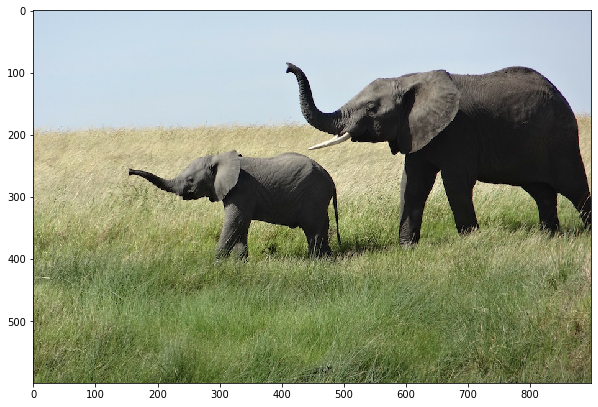

In [2]:
img = np.array(plt.imread('creative_commons_elephant.jpg'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

In [3]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                    include_top=True)
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
image = np.array(Image.fromarray(img).resize((224,224)), dtype='float32')
y_image = vgg19.predict(np.expand_dims(image, axis=0))
tf.keras.applications.vgg19.decode_predictions(y_image, top=5)

[[('n02504458', 'African_elephant', 0.9423455),
  ('n01871265', 'tusker', 0.046533402),
  ('n02504013', 'Indian_elephant', 0.0110594),
  ('n02408429', 'water_buffalo', 3.169009e-05),
  ('n02437312', 'Arabian_camel', 1.5719932e-05)]]

In [5]:
def ConvVGG19(shape):
    x = tf.keras.Input(shape=shape)
    y = x
    for layer in vgg19.layers[1:-4]:
        layer_ = layer.__class__.from_config(layer.get_config())   
        y = layer_(y)     
    y = tf.keras.layers.Conv2D(filters=4096, 
                               kernel_size=(7,7), 
                               strides=(1,1), 
                               padding='valid', 
                               activation='relu', 
                               kernel_initializer='glorot_uniform', 
                               bias_initializer='zeros',
                               name='fc1')(y)    
    y = tf.keras.layers.Conv2D(filters=4096, 
                               kernel_size=(1,1), 
                               strides=(1,1), 
                               padding='valid', 
                               activation='relu', 
                               kernel_initializer='glorot_uniform', 
                               bias_initializer='zeros',
                               name='fc2')(y)
    y = tf.keras.layers.Conv2D(filters=1000, 
                               kernel_size=(1,1), 
                               strides=(1,1), 
                               padding='valid', 
                               activation='softmax', 
                               kernel_initializer='glorot_uniform', 
                               bias_initializer='zeros',
                               name='predictions')(y) 
    model = tf.keras.Model(x, y)  
    for layer in vgg19.layers[1:]:
        if layer.name=='flatten':
            continue
        if layer.name=='fc1':
            weights = layer.get_weights()
            weights_ = [np.reshape(weights[0], (7,7,512,4096)), weights[1]]
            layer_ = model.get_layer(name=layer.name)
            layer_.set_weights(weights_)
            continue
        if layer.name=='fc2':
            weights = layer.get_weights()
            weights_ = [np.reshape(weights[0], (1,1,4096,4096)), weights[1]]
            layer_ = model.get_layer(name=layer.name)
            layer_.set_weights(weights_)
            continue
        if layer.name=='predictions':
            weights = layer.get_weights()
            weights_ = [np.reshape(weights[0], (1,1,4096,1000)), weights[1]]
            layer_ = model.get_layer(name=layer.name)
            layer_.set_weights(weights_)
            continue
        layer_ = model.get_layer(name=layer.name)
        layer_.set_weights(layer.get_weights())
    model.summary()
    return model

In [6]:
conv_vgg19 = ConvVGG19(shape=(224,224,3))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
image = np.array(Image.fromarray(img).resize((224,224)), dtype='float32')
y_image = conv_vgg19.predict(np.expand_dims(image, axis=0))

for i in range(y_image.shape[1]):
    for j in range(y_image.shape[2]):
        print(tf.keras.applications.vgg19.decode_predictions(y_image[:,i,j,:], top=5))
        print()

[[('n02504458', 'African_elephant', 0.9423455), ('n01871265', 'tusker', 0.046533402), ('n02504013', 'Indian_elephant', 0.011059401), ('n02408429', 'water_buffalo', 3.169009e-05), ('n02437312', 'Arabian_camel', 1.5719932e-05)]]



-----

In [8]:
conv_vgg19_ = ConvVGG19(shape=(640,640,3))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 160, 160, 128)     0   

In [9]:
image_ = np.array(Image.fromarray(img).resize((640,640)), dtype='float32')
y_image_ = conv_vgg19_.predict(np.expand_dims(image_, axis=0))

for i in range(y_image_.shape[1]):
    for j in range(y_image_.shape[2]):
        print(tf.keras.applications.vgg19.decode_predictions(y_image_[:,i,j,:], top=5))
        print()

[[('n07802026', 'hay', 0.02188805), ('n03888257', 'parachute', 0.017288929), ('n02894605', 'breakwater', 0.014145039), ('n04252077', 'snowmobile', 0.012494175), ('n02793495', 'barn', 0.009852781)]]

[[('n07802026', 'hay', 0.0269061), ('n02894605', 'breakwater', 0.025823118), ('n03888257', 'parachute', 0.019845515), ('n09332890', 'lakeside', 0.0125769), ('n02814860', 'beacon', 0.010848389)]]

[[('n02058221', 'albatross', 0.107007004), ('n01614925', 'bald_eagle', 0.038389836), ('n01855672', 'goose', 0.036306076), ('n01795545', 'black_grouse', 0.028390523), ('n01608432', 'kite', 0.022859564)]]

[[('n02504458', 'African_elephant', 0.12980038), ('n02504013', 'Indian_elephant', 0.09825825), ('n01871265', 'tusker', 0.0887501), ('n01518878', 'ostrich', 0.06907993), ('n01855672', 'goose', 0.05432047)]]

[[('n02504013', 'Indian_elephant', 0.25580454), ('n02504458', 'African_elephant', 0.21492392), ('n01518878', 'ostrich', 0.1665325), ('n02437312', 'Arabian_camel', 0.094831906), ('n01871265', 'tu